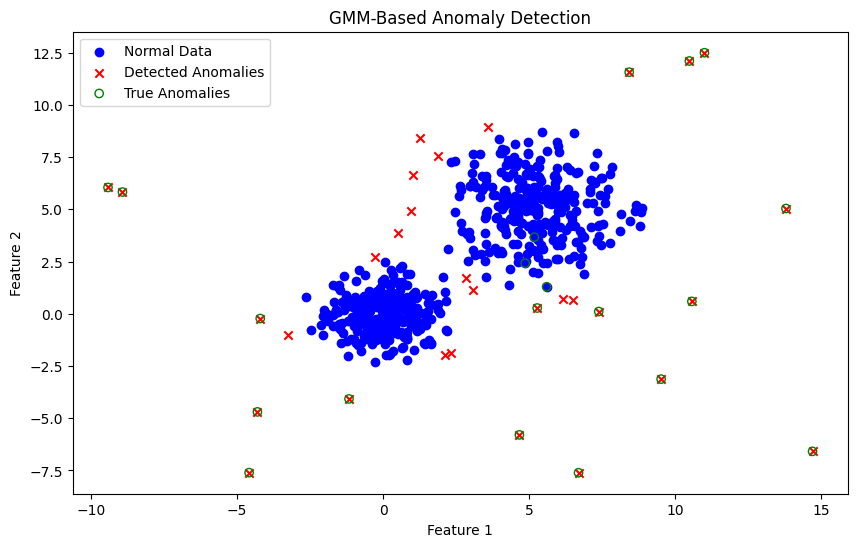

Number of detected anomalies: 31


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Step 1: Generate synthetic data (normal data and anomalies)
np.random.seed(42)

# Generate normal data (two Gaussian distributions)
data_1 = np.random.normal(loc=0, scale=1, size=(300, 2))  # Gaussian 1
data_2 = np.random.normal(loc=5, scale=1.5, size=(300, 2))  # Gaussian 2

# Concatenate the two normal datasets
normal_data = np.vstack([data_1, data_2])

# Generate some anomalies
anomalies = np.random.uniform(low=-10, high=15, size=(20, 2))

# Combine normal data and anomalies
data = np.vstack([normal_data, anomalies])

# Step 2: Fit the Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(normal_data)  # Fit the model only on the normal data

# Step 3: Compute the log-likelihood (probability score) for each data point
log_likelihood = gmm.score_samples(data)

# Step 4: Set a threshold for anomaly detection
threshold = np.percentile(log_likelihood, 5)  # Define threshold as the 5th percentile

# Step 5: Detect anomalies
anomalies_detected = data[log_likelihood < threshold]
normal_points = data[log_likelihood >= threshold]

# Step 6: Plot the results
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(normal_points[:, 0], normal_points[:, 1], color='blue', label='Normal Data')

# Plot detected anomalies
plt.scatter(anomalies_detected[:, 0], anomalies_detected[:, 1], color='red', marker='x', label='Detected Anomalies')

# Highlight injected anomalies (actual anomalies)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='green', marker='o', facecolors='none', label='True Anomalies')

plt.title('GMM-Based Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"Number of detected anomalies: {len(anomalies_detected)}")
